In [1]:
import matplotlib.pyplot as plt
from fvm_utils import *

In [26]:
file = "/Users/danny/code/uchicago/sociohydro/data/raw/gridded/Illinois_Cook.hdf5"

with h5py.File(file, "r") as d:
    x_grid = d["1990"]["x_grid"][:]
    y_grid = d["1990"]["y_grid"][:]
    black_final = d["2020"]["black_grid_masked"][:]
    white_final = d["2020"]["white_grid_masked"][:]

ϕWf_grid = (white_final) / (1.1 * capacity)
ϕBf_grid = (black_final) / (1.1 * capacity)
ϕWf_cell = interpolate.griddata(grid_points,
                                np.nan_to_num(ϕWf_grid.ravel(), nan=1e-3),
                                cell_points,
                                fill_value=0)
ϕBf_cell = interpolate.griddata(grid_points,
                                np.nan_to_num(ϕBf_grid.ravel(), nan=1e-3),
                                cell_points,
                                fill_value=0)

In [64]:
run run_Schelling2D2S_geographicArea -datafile /Users/danny/code/uchicago/sociohydro/data/raw/gridded/Illinois_Cook.hdf5 -cellsize 3e3 -capacityType local -temp 100 -gamma 100 -savefolder ~/Google\ Drive/My\ Drive/uchicago/sociohydro/2024-04-17_illinoisTest -filename gamma100_temp100

Mean-square error, White: 0.1045
Mean-square error, Black: 0.0100


In [66]:
ϕW_array.shape

(101, 5201)

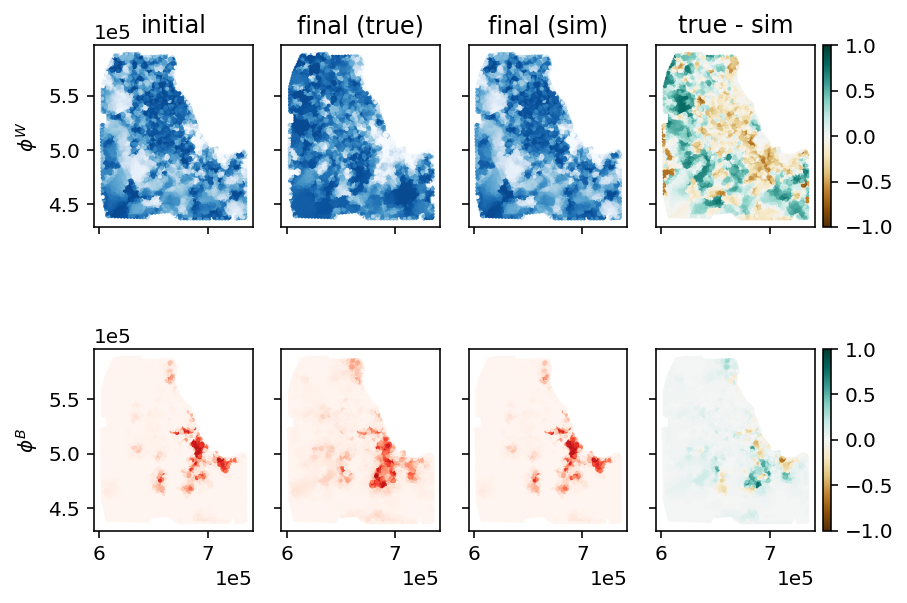

In [57]:
fig, ax = plt.subplots(2, 4, dpi=144, sharey=True, sharex=True)

# initial
ax[0, 0].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕW_array[0], s=1, cmap="Blues",
                 vmin=0, vmax=1)
ax[1, 0].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕB_array[0], s=1, cmap="Reds",
                 vmin=0, vmax=1)
ax[0, 0].set(title="initial", ylabel=r"$\phi^W$")

# final (true)
ax[0, 1].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕWf_cell, s=1, cmap="Blues",
                 vmin=0, vmax=1)
ax[1, 1].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕBf_cell, s=1, cmap="Reds",
                 vmin=0, vmax=1)
ax[0, 1].set(title="final (true)")

# final (sim)
ax[0, 2].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕW_array[-1], s=1, cmap="Blues",
                 vmin=0, vmax=1)
ax[1, 2].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕB_array[-1], s=1, cmap="Reds",
                 vmin=0, vmax=1)
ax[0, 2].set(title="final (sim)")

# difference
diffW = ax[0, 3].scatter(mesh.cellCenters.value[0],
                         mesh.cellCenters.value[1],
                         c=(ϕWf_cell - ϕW_array[-1]),
                         s=1, cmap="BrBG", vmin=-1, vmax=1)
caxW = ax[0, 3].inset_axes([1.05, 0.0, 0.05, 1])
cbarW = fig.colorbar(diffW, cax=caxW, ax=ax[0, 3])

diffB = ax[1, 3].scatter(mesh.cellCenters.value[0],
                         mesh.cellCenters.value[1],
                         c=(ϕBf_cell - ϕB_array[-1]),
                         s=1, cmap="BrBG", vmin=-1, vmax=1)
caxB = ax[1, 3].inset_axes([1.05, 0.0, 0.05, 1])
cbarB = fig.colorbar(diffB, cax=caxB, ax=ax[1, 3])


ax[0, 3].set(title="true - sim") 

for a in ax.ravel():
    a.set_aspect(1)
    a.ticklabel_format(axis="both", style="sci", scilimits=(0,0))


ax[1, 0].set(ylabel=r"$\phi^B$")

plt.tight_layout()

In [58]:
((ϕWf_cell - ϕW_array[-1])**2).mean()


0.10448376005872408

In [59]:
((ϕBf_cell - ϕB_array[-1])**2).mean()

0.010036141790883702

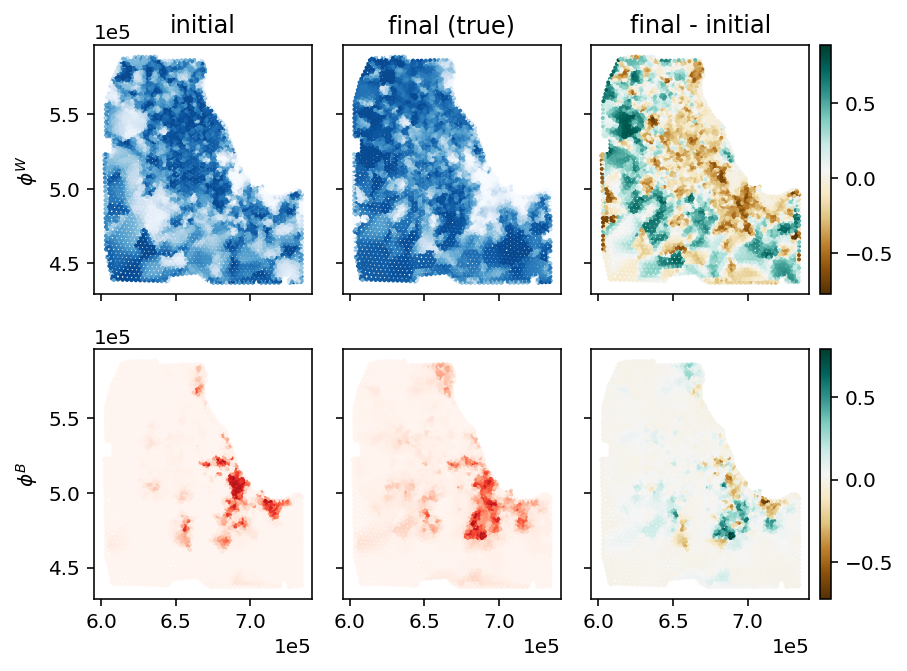

In [49]:
fig, ax = plt.subplots(2, 3, dpi=144, sharey=True, sharex=True)

# initial
ax[0, 0].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕW_array[0], s=1, cmap="Blues",
                 vmin=0, vmax=1)
ax[1, 0].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕB_array[0], s=1, cmap="Reds",
                 vmin=0, vmax=1)
ax[0, 0].set(title="initial", ylabel=r"$\phi^W$")

# final (true)
ax[0, 1].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕWf_cell, s=1, cmap="Blues",
                 vmin=0, vmax=1)
ax[1, 1].scatter(mesh.cellCenters.value[0],
                 mesh.cellCenters.value[1],
                 c=ϕBf_cell, s=1, cmap="Reds",
                 vmin=0, vmax=1)
ax[0, 1].set(title="final (true)")

# difference
diffW = ax[0, 2].scatter(mesh.cellCenters.value[0],
                         mesh.cellCenters.value[1],
                         c=ϕWf_cell - ϕW0_cell, s=1,
                         cmap="BrBG")
caxW = ax[0, 2].inset_axes([1.05, 0.0, 0.05, 1])
cbarW = fig.colorbar(diffW, cax=caxW, ax=ax[0, 2])

diffB = ax[1, 2].scatter(mesh.cellCenters.value[0],
                         mesh.cellCenters.value[1],
                         c=ϕBf_cell - ϕB0_cell, s=1,
                         cmap="BrBG")
caxB = ax[1, 2].inset_axes([1.05, 0.0, 0.05, 1])
cbarB = fig.colorbar(diffB, cax=caxB, ax=ax[1, 2])


ax[0, 2].set(title="final - initial") 

for a in ax.ravel():
    a.set_aspect(1)
    a.ticklabel_format(axis="both", style="sci", scilimits=(0,0))


ax[1, 0].set(ylabel=r"$\phi^B$")

plt.tight_layout()

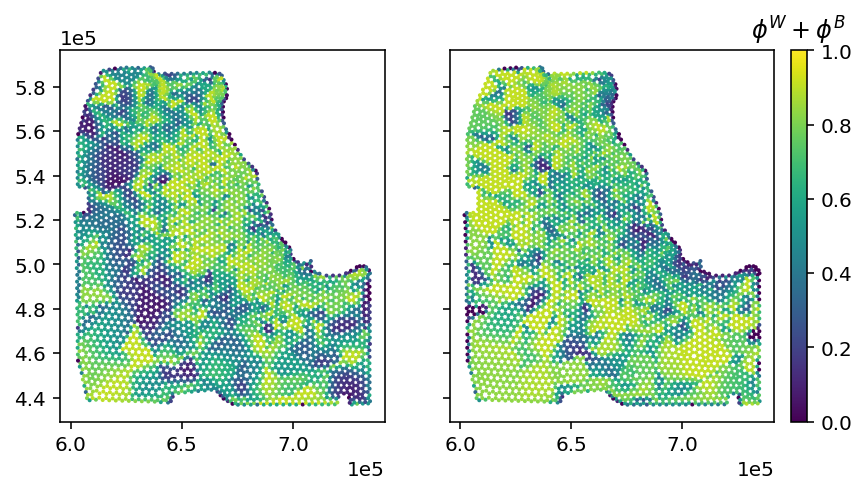

In [44]:
fig, ax = plt.subplots(1, 2, dpi=144, sharey=True)
scat0 = ax[0].scatter(cell_points[:, 0], cell_points[:, 1],
                      c=ϕW0_cell + ϕB0_cell, s=1, vmin=0, vmax=1)
scatf = ax[1].scatter(cell_points[:, 0], cell_points[:, 1],
                      c=ϕWf_cell + ϕBf_cell, s=1, vmin=0, vmax=1)
cax = ax[1].inset_axes([1.05, 0.0, 0.05, 1])
cbar = fig.colorbar(scatf, ax=ax[1], cax=cax)
cbar.ax.set(title=r"$\phi^W + \phi^B$")

for a in ax.ravel():
    a.set_aspect(1)
    a.ticklabel_format(axis="both", style="sci", scilimits=(0,0))

In [45]:
(ϕW0_cell + ϕB0_cell).mean()

0.5939034111286784

In [46]:
(ϕWf_cell + ϕBf_cell).mean()

0.6910463436181309

## Check interpolation

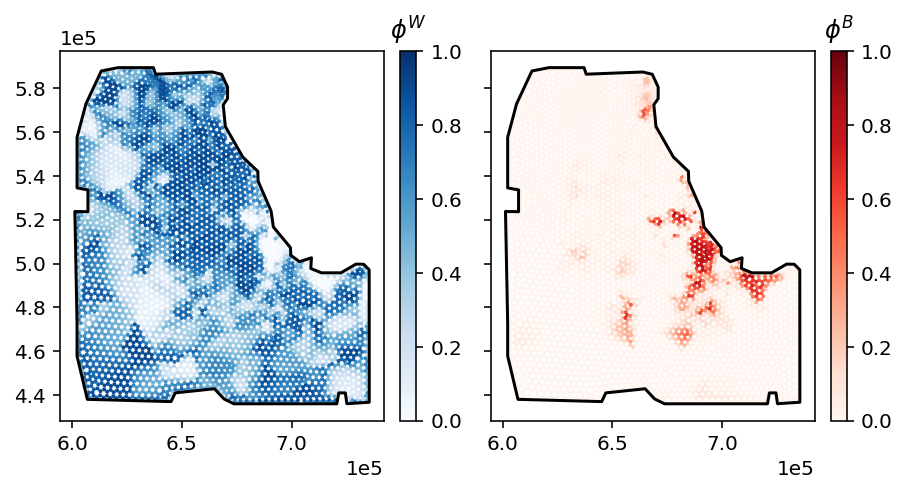

In [114]:
fig, ax = plt.subplots(1, 2, dpi=144, sharey=True)
simple_boundary.boundary.plot(ax=ax[0], color="k")
simple_boundary.boundary.plot(ax=ax[1], color="k")
scatW = ax[0].scatter(mesh.cellCenters.value[0],
                      mesh.cellCenters.value[1],
                      c=ϕW0_cell, s=1,
                      cmap="Blues", vmin=0, vmax=1)
cax0 = ax[0].inset_axes([1.05, 0.0, 0.05, 1])
cbar0 = fig.colorbar(scatW, ax=ax[0], cax=cax0)
cbar0.ax.set(title=r"$\phi^W$")
ax[0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

scatB = ax[1].scatter(mesh.cellCenters.value[0],
                      mesh.cellCenters.value[1],
                      c=ϕB0_cell, s=1,
                      cmap="Reds", vmin=0, vmax=1)
cax1 = ax[1].inset_axes([1.05, 0.0, 0.05, 1])
cbar1 = fig.colorbar(scatB, ax=ax[1], cax=cax1)
cbar1.ax.set(title=r"$\phi^B$")
ax[1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
plt.tight_layout()
